# Project : Personal Loan Campaign Modelling

### Background and Context:

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective:

* To predict whether a liability customer will buy a personal loan or not.
* Which variables are most significant.
* Which segment of customers should be targeted more.

### Data Dictionary:

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



### Import the necessary packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LinearRegression

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score
from sklearn.model_selection import GridSearchCV

### Read the dataset

In [2]:
data=pd.read_csv( r'C:\Users\robby\Downloads\Loan_Modelling.csv')

In [3]:
# copying data to another varaible to avoid any changes to original data
data=data.copy()

### View the first and last 10 rows of the dataset.

In [4]:
data.head(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   
5   6   37          13      29    92121       4    0.4          2       155   
6   7   53          27      72    91711       2    1.5          2         0   
7   8   50          24      22    93943       1    0.3          3         0   
8   9   35          10      81    90089       3    0.6          2       104   
9  10   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [5]:
data.tail(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4990  4991   55          25      58    95023       4   2.00          3   
4991  4992   51          25      92    91330       1   1.90          2   
4992  4993   30           5      13    90037       4   0.50          3   
4993  4994   45          21     218    91801       2   6.67          1   
4994  4995   64          40      75    94588       3   2.00          3   
4995  4996   29           3      40    92697       1   1.90          3   
4996  4997   30           4      15    92037       4   0.40          1   
4997  4998   63          39      24    93023       2   0.30          3   
4998  4999   65          40      49    90034       3   0.50          2   
4999  5000   28           4      83    92612       3   0.80          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4990       219              0                   0           0       0   
4991       100              0                   0           0       0   
4992         0              0                   0           0       0   
4993         0              0                   0           0       1   
4994         0              0                   0           0       1   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4990           1  
4991           1  
4992           0  
4993           0  
4994           0  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [6]:
data.shape

(5000, 14)

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Check for missing values

In [8]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

### Give a statistical summary for the dataset

In [11]:
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

### Observations

* There is 5000 entries and 14 columes
* The youngest person is 23 and the oldest is 67 and the Avg. age is 45
* The lowest income is 8,000 and the highest is 224,000 and the avg. is 64,000
* No null values or duplicated data
* The biggest family size is 4 and the smallest is 1
* The lowest CCAvg is 0.00 and the highest 10.00
* Mortgage and Zip Code have high unique counts that should be looked into

### EDA
#### Univariate analysis

In [12]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

In [117]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Age"],palette='winter')
perc_on_bar(ax,data["Age"])

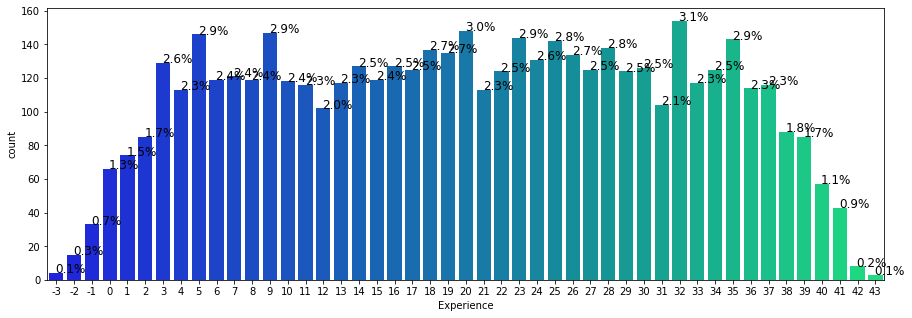

In [15]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Experience"],palette='winter')
perc_on_bar(ax,data["Experience"])

In [16]:
plt.figure(figsize=(65,45))
ax = sns.countplot(data["Income"],palette='winter')
perc_on_bar(ax,data["Income"])

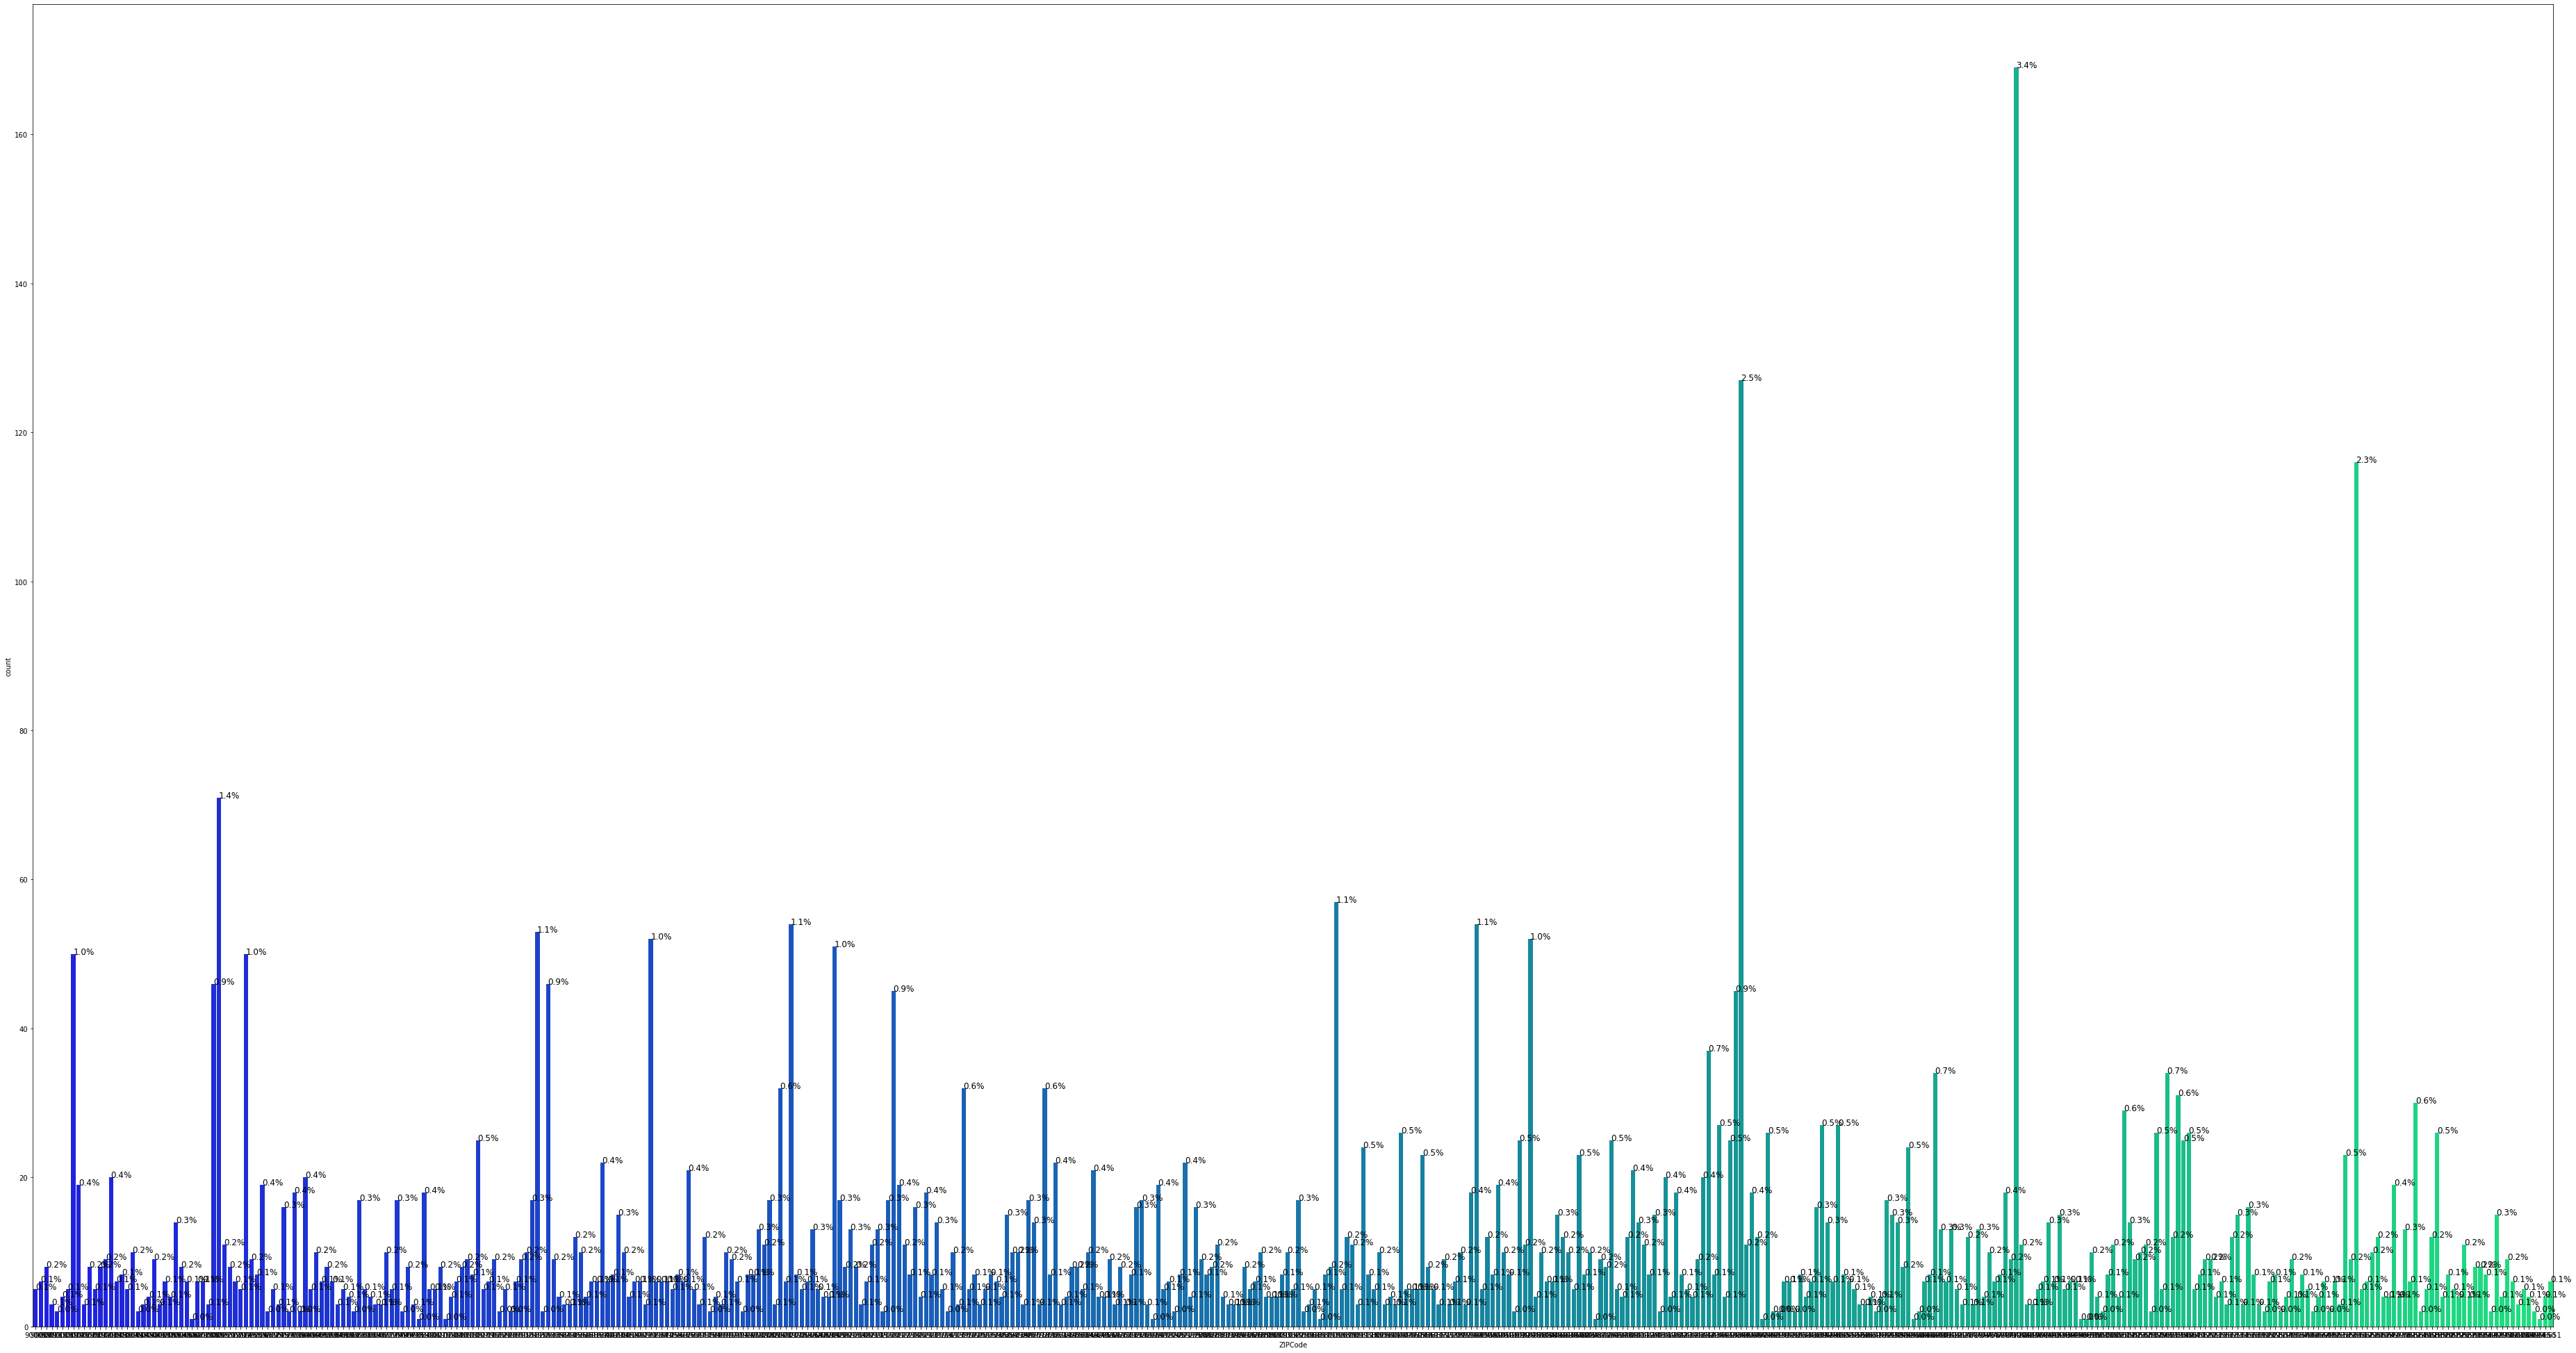

In [17]:
plt.figure(figsize=(65,35))
ax = sns.countplot(data["ZIPCode"],palette='winter')
perc_on_bar(ax,data["ZIPCode"])

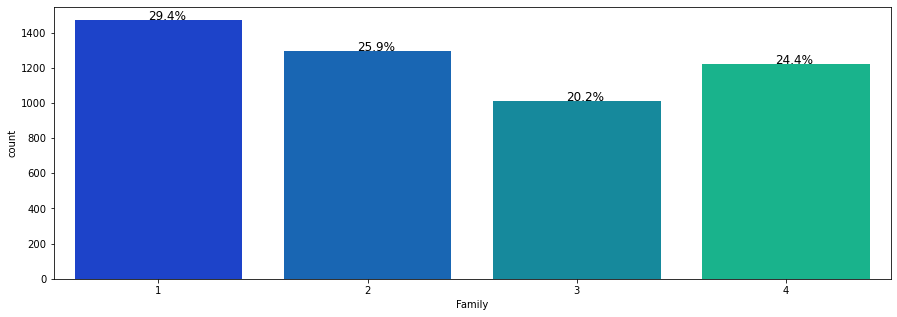

In [18]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Family"],palette='winter')
perc_on_bar(ax,data["Family"])

In [19]:
plt.figure(figsize=(45,15))
ax = sns.countplot(data["CCAvg"],palette='winter')
perc_on_bar(ax,data["CCAvg"])

In [20]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Education"],palette='winter')
perc_on_bar(ax,data["Education"])

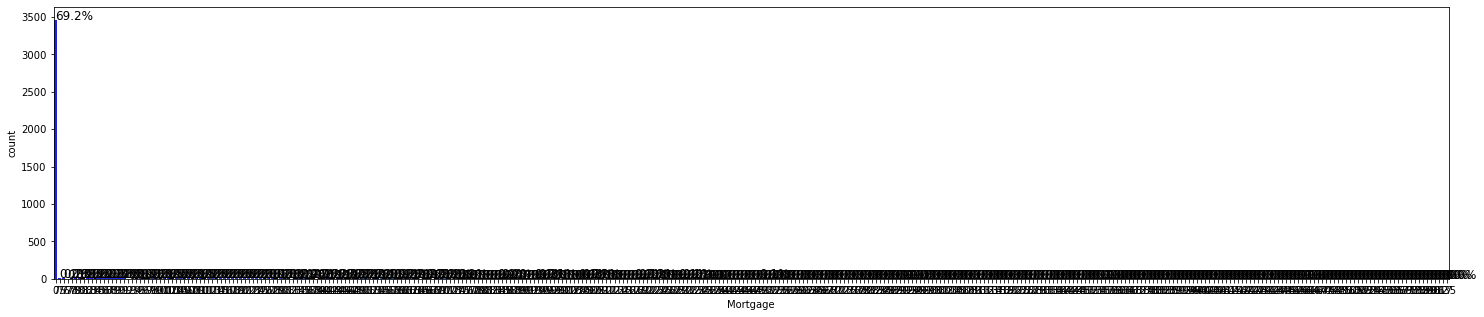

In [21]:
plt.figure(figsize=(25,5))
ax = sns.countplot(data["Mortgage"],palette='winter')
perc_on_bar(ax,data["Mortgage"])

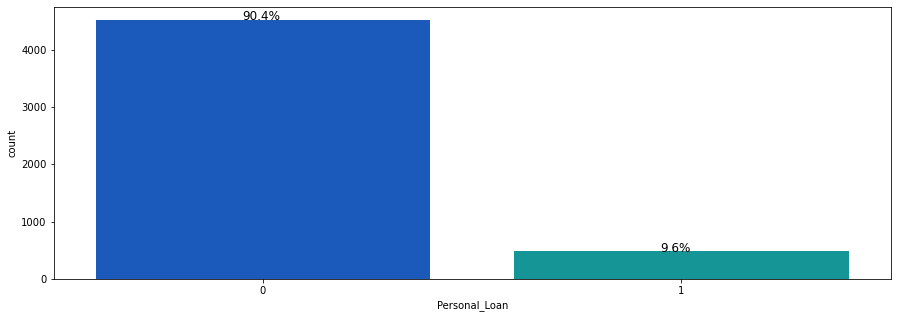

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Personal_Loan"],palette='winter')
perc_on_bar(ax,data["Personal_Loan"])

## Bivariate Analysis

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

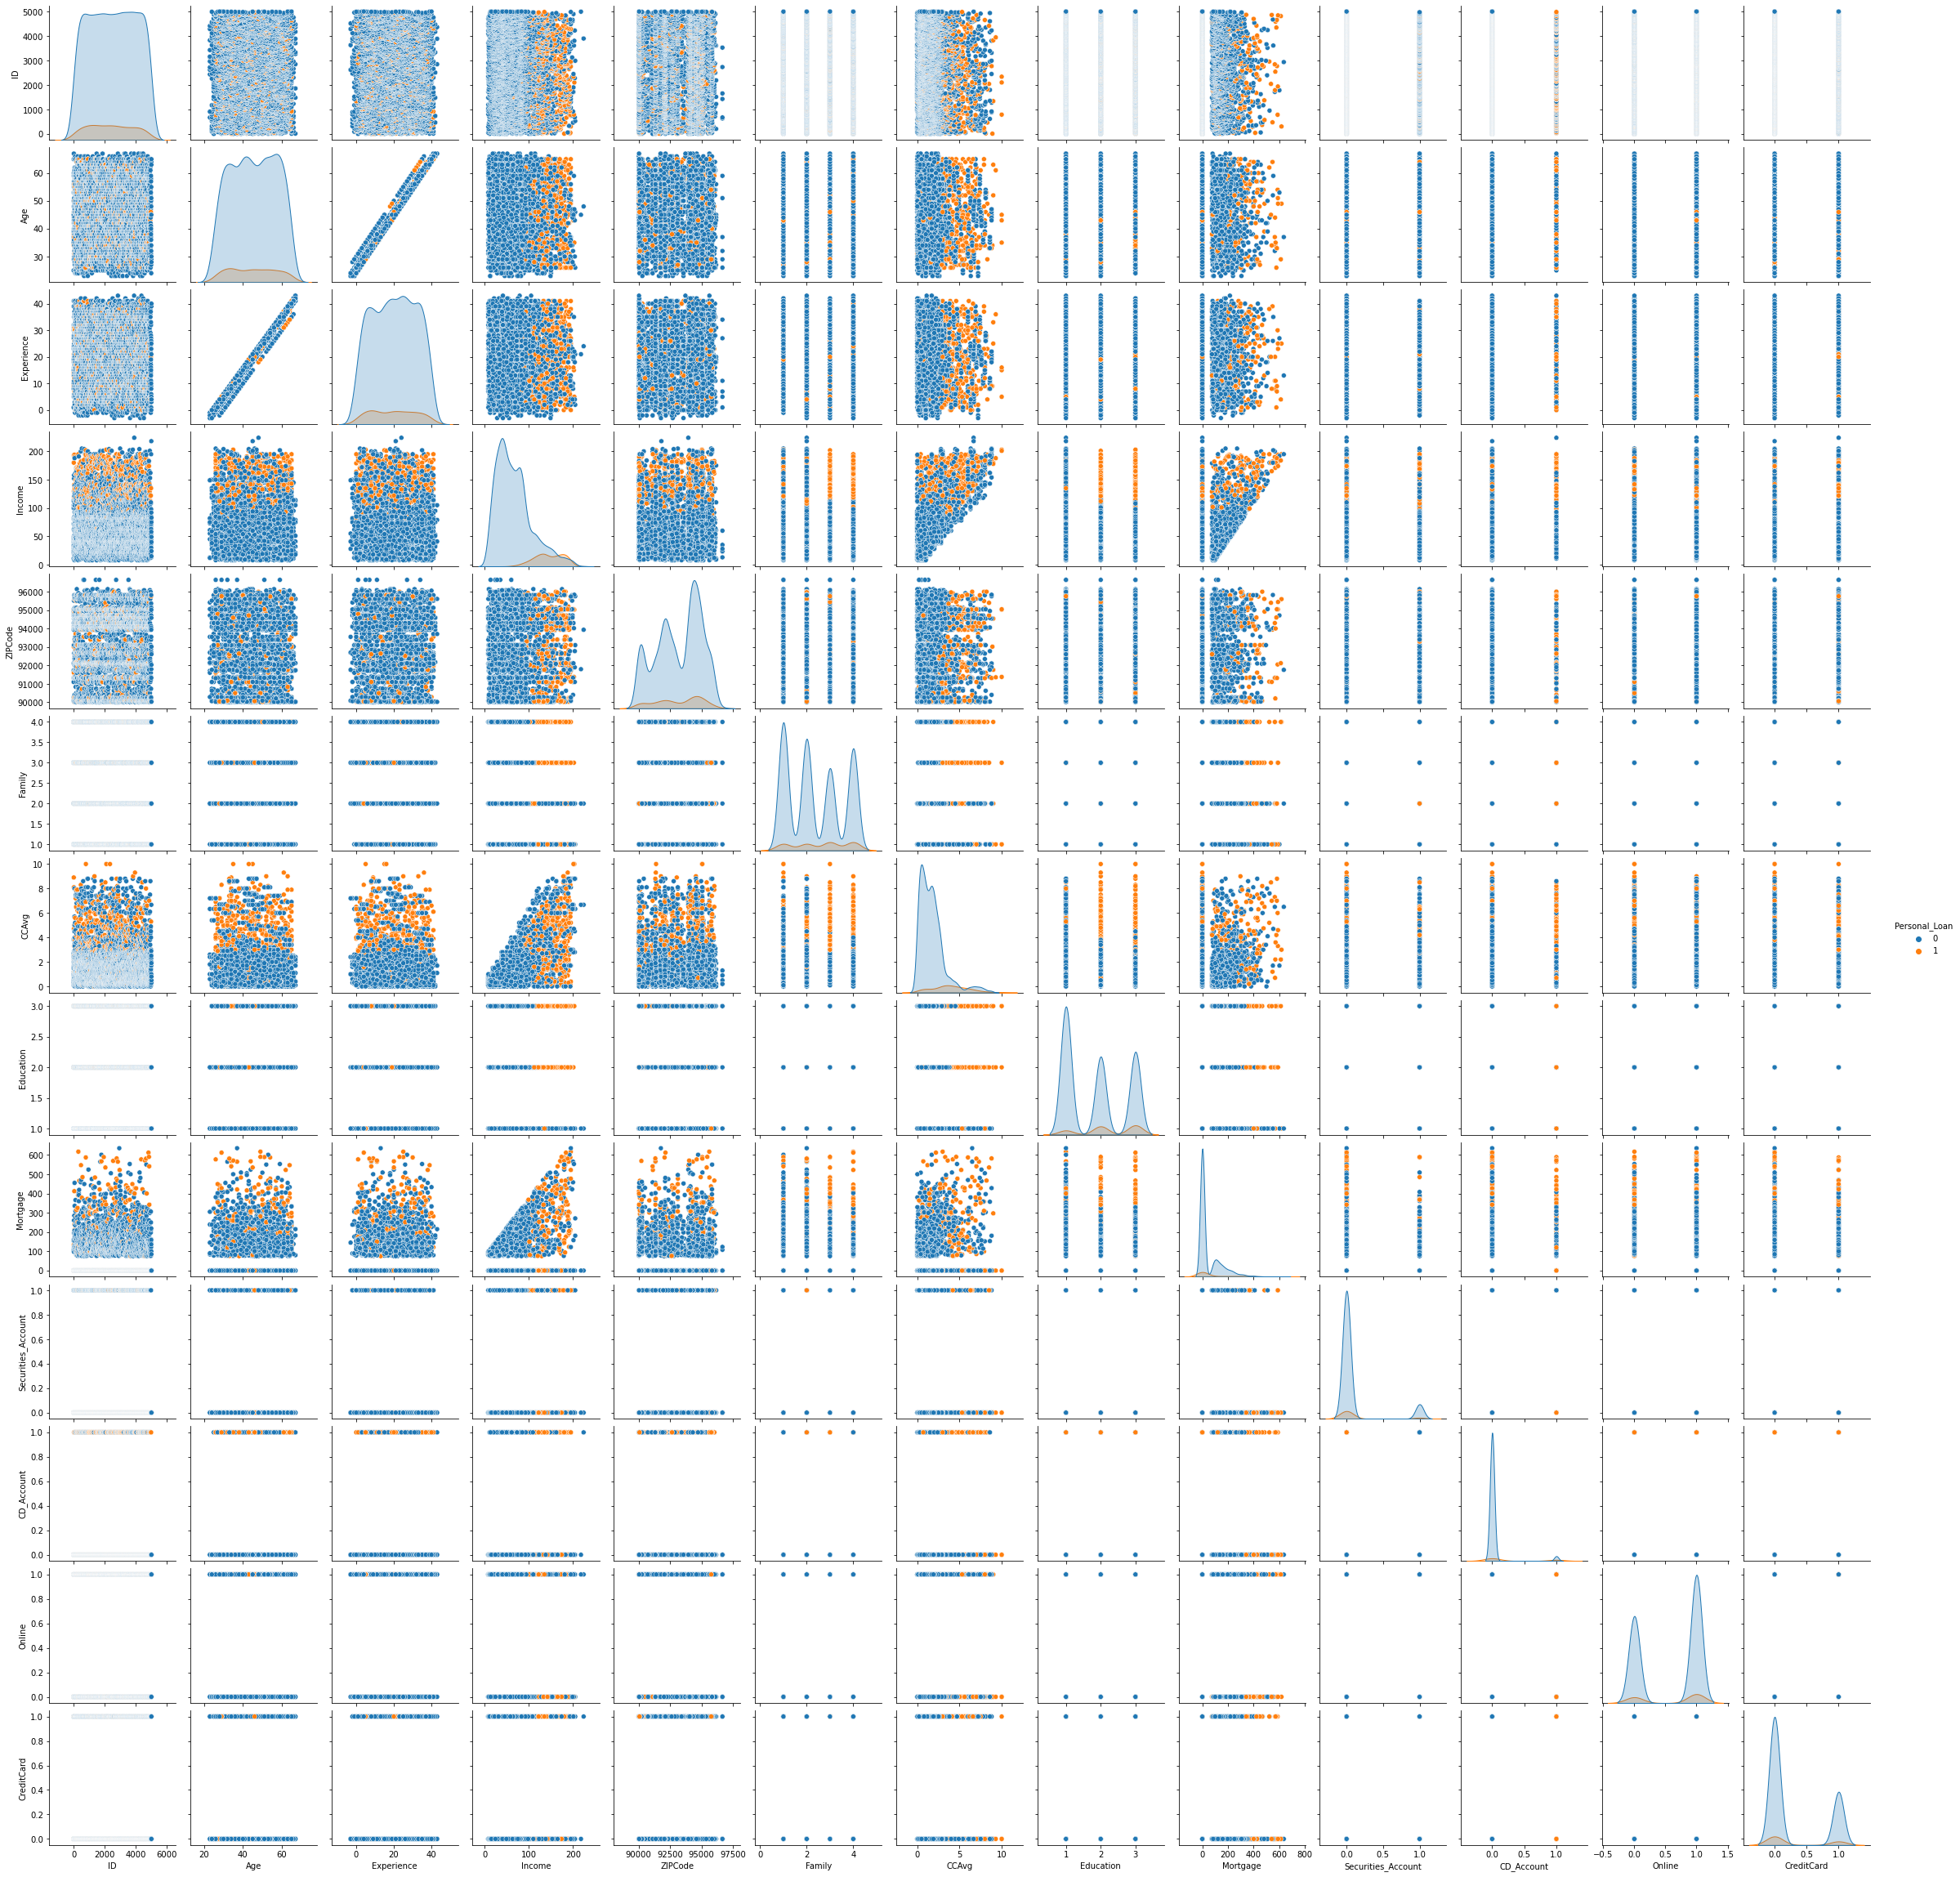

In [24]:
sns.pairplot(data=data,hue="Personal_Loan",)
plt.show()

In [25]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

In [26]:
stacked_plot(data['Age'])

Personal_Loan     0    1   All
Age                           
23               12    0    12
24               28    0    28
25               53    0    53
26               65   13    78
27               79   12    91
28               94    9   103
29              108   15   123
30              119   17   136
31              118    7   125
32              108   12   120
33              105   15   120
34              116   18   134
35              135   16   151
36               91   16   107
37               98    8   106
38              103   12   115
39              127    6   133
40              117    8   125
41              128    8   136
42              112   14   126
43              134   15   149
44              107   14   121
45              114   13   127
46              114   13   127
47              103   10   113
48              106   12   118
49              105   10   115
50              125   13   138
51              119   10   129
52              130   15   145
53      

Personal_Loan     0    1   All
Mortgage                      
0              3150  312  3462
75                7    1     8
76               11    1    12
77                4    0     4
78               15    0    15
...             ...  ...   ...
601               1    0     1
612               0    1     1
617               0    1     1
635               1    0     1
All            4520  480  5000

[348 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


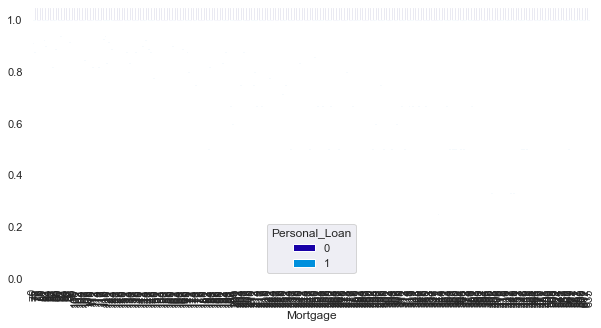

In [27]:
stacked_plot(data['Mortgage'])

In [28]:
stacked_plot(data['Experience'])

Personal_Loan     0    1   All
Experience                    
-3                4    0     4
-2               15    0    15
-1               33    0    33
0                59    7    66
1                66    8    74
2                76    9    85
3               112   17   129
4               104    9   113
5               132   14   146
6               107   12   119
7               109   12   121
8               101   18   119
9               127   20   147
10              111    7   118
11              103   13   116
12               86   16   102
13              106   11   117
14              121    6   127
15              114    5   119
16              114   13   127
17              114   11   125
18              125   12   137
19              121   14   135
20              131   17   148
21              102   11   113
22              111   13   124
23              131   13   144
24              123    8   131
25              128   14   142
26              120   14   134
27      

Personal_Loan     0    1   All
Income                        
8                23    0    23
9                26    0    26
10               23    0    23
11               27    0    27
12               30    0    30
13               32    0    32
14               31    0    31
15               33    0    33
18               53    0    53
19               52    0    52
20               47    0    47
21               65    0    65
22               65    0    65
23               54    0    54
24               47    0    47
25               64    0    64
28               63    0    63
29               67    0    67
30               63    0    63
31               55    0    55
32               58    0    58
33               51    0    51
34               53    0    53
35               65    0    65
38               84    0    84
39               81    0    81
40               78    0    78
41               82    0    82
42               77    0    77
43               70    0    70
44      

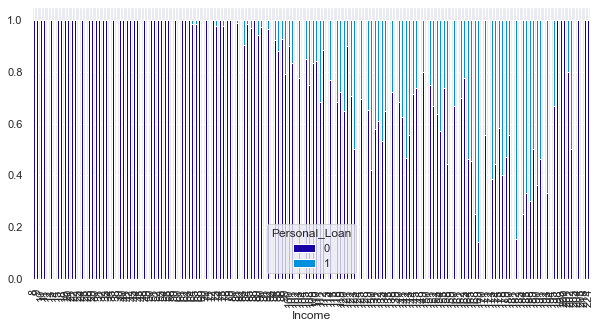

In [29]:
stacked_plot(data['Income'])

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


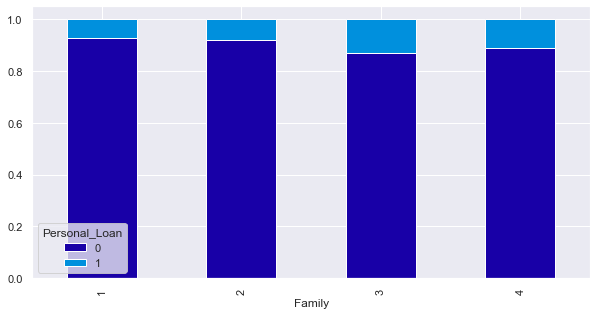

In [30]:
stacked_plot(data['Family'])

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


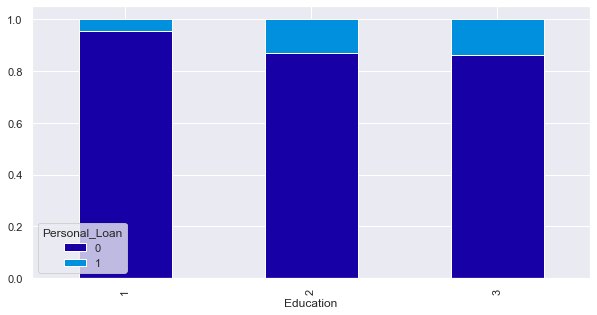

In [31]:
stacked_plot(data['Education'])

Personal_Loan     0    1   All
CCAvg                         
0.0             105    1   106
0.1             181    2   183
0.2             196    8   204
0.3             235    6   241
0.4             175    4   179
0.5             155    8   163
0.6             114    4   118
0.67             18    0    18
0.7             163    6   169
0.75              9    0     9
0.8             182    5   187
0.9             103    3   106
1.0             229    2   231
1.1              77    7    84
1.2              60    6    66
1.3             121    7   128
1.33              9    0     9
1.4             131    5   136
1.5             174    4   178
1.6              98    3   101
1.67             18    0    18
1.7             154    4   158
1.75              9    0     9
1.8             149    3   152
1.9             102    4   106
2.0             184    4   188
2.1              97    3   100
2.2             123    7   130
2.3              53    5    58
2.33             18    0    18
2.4     

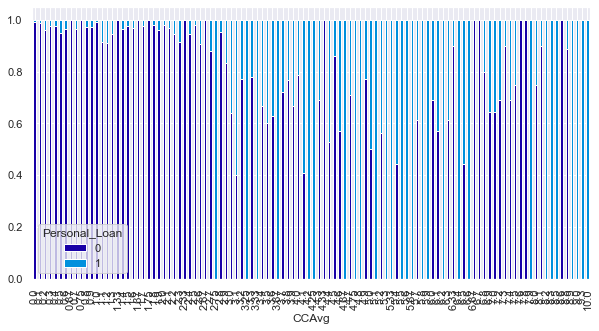

In [32]:
stacked_plot(data['CCAvg'])

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


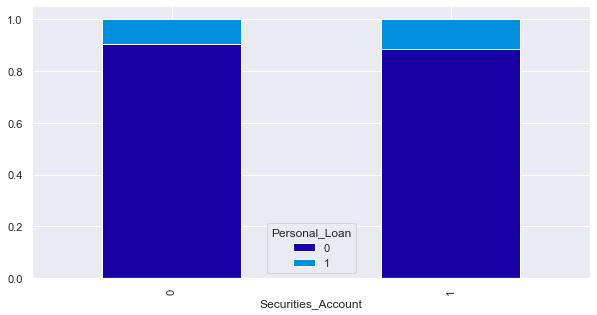

In [33]:
stacked_plot(data['Securities_Account'])

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


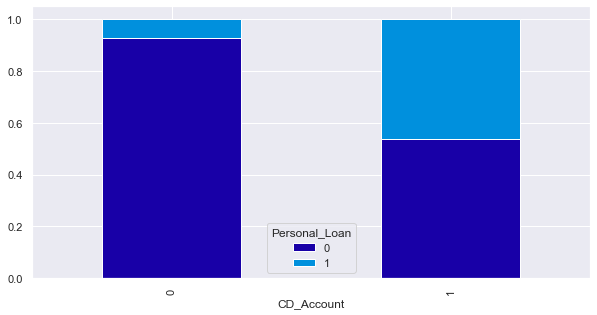

In [34]:
stacked_plot(data['CD_Account'])

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


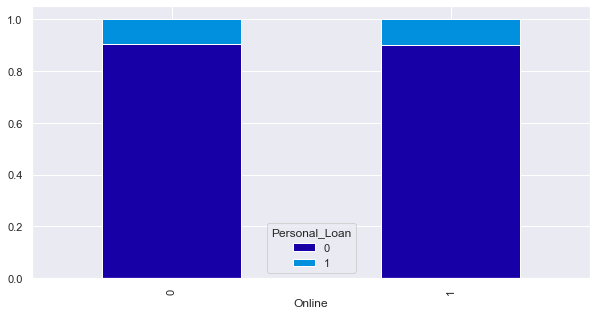

In [35]:
stacked_plot(data['Online'])

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


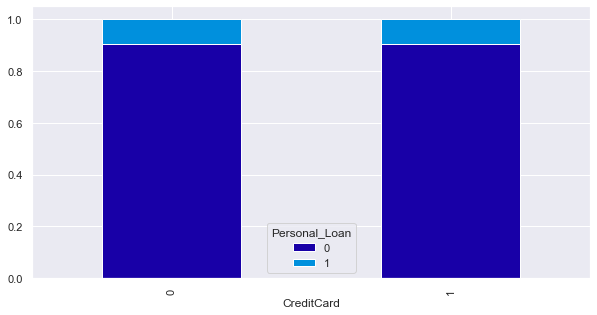

In [36]:
stacked_plot(data['CreditCard'])

In [37]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['CCAvg'],margins=True)
    print(tab1)
    print('-'*200)
    tab = pd.crosstab(x,data['CCAvg'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize= (20,10))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

CCAvg   0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.67  0.7  0.75  0.8  0.9  1.0  \
Income                                                                      
8         0    5    2    4    3    1    1     1    3     0    1    1    1   
9         3    3    5    5    0    3    1     0    3     0    0    0    3   
10        1    3    1    2    5    2    0     1    5     0    1    0    2   
11        2    5    5    3    2    2    1     1    1     0    1    1    3   
12        1    3    5    3    3    2    2     1    2     0    0    0    8   
13        2    1    2    4    4    3    1     1    3     0    1    6    4   
14        1    5    1    2    5    2    1     0    3     0    2    3    6   
15        1    4    3    5    6    0    4     0    2     0    4    2    2   
18        1    5    4   12   10    4    2     0    0     0    1    3    2   
19        1    3    4    4    9    6    1     2    4     2    1    3    2   
20        1    3    4    6    7    6    1     1    2     1    2    0    6   

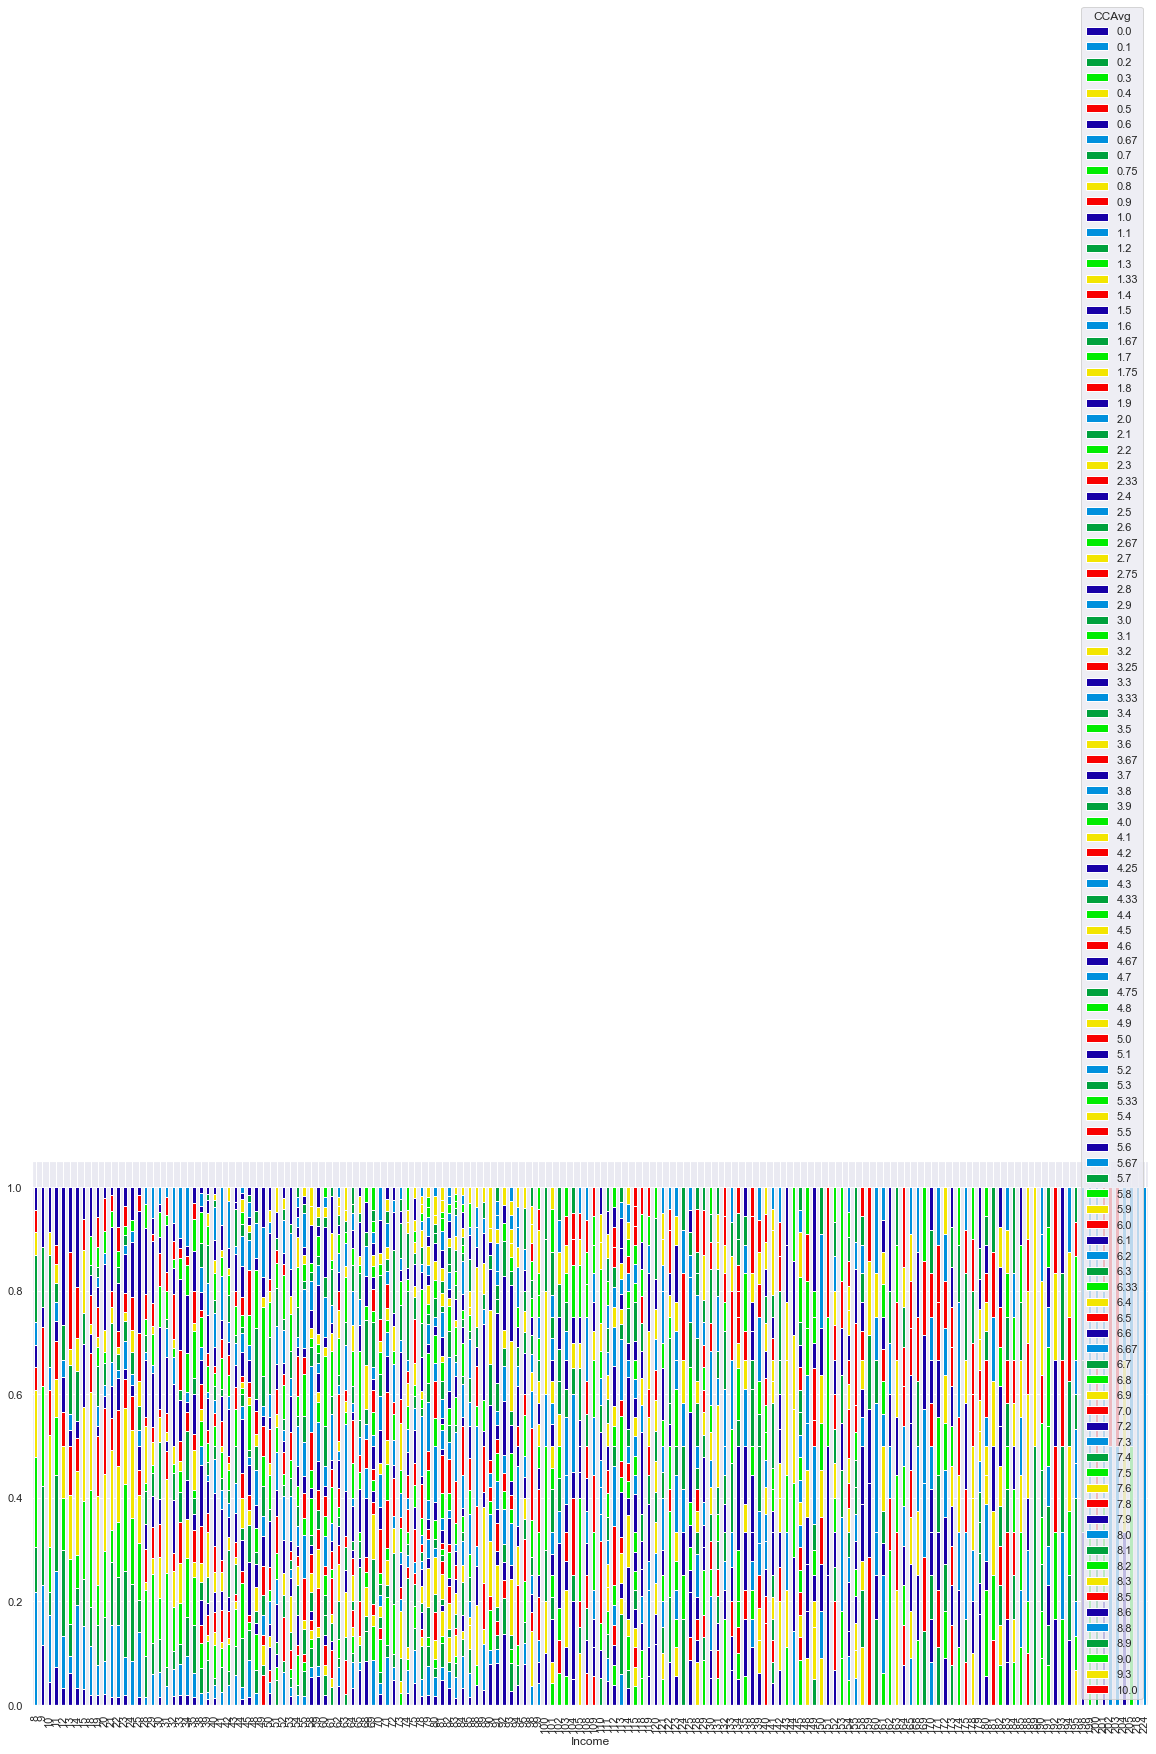

In [38]:
stacked_plot(data['Income'])

### Observations

#### Univariate Analysis
* Age of 34 and 43 have the highest customer counts
* 3.1 % of customers have 32 years of experience
* 5.1% of the customers have either 38,000 or 44,000 or 81,000 income per year
* 29.4 % of customers are single 
* Most of the customers are on the lower end of the CCAvg and only .01% have a 10.00
* 41.9% of the customers are uneducated
* 90.4% did not accept the loan on the last campaign 

#### Bivariate Analysis
* Income and Personal loans have the highest correlationship at .5
* CCAvg and income follow in close second correlation at .65
* 17 customers of the age of 30 accepted the loan from the last campaign
* 11 customers with the income of 182,000 accepted the loan from the last campaign
* 134 customers with a family size of 4 accepted the loan from the last campaign 

### Data Preperation

In [39]:
data = data.drop(['Income','ID'],axis=1) 

## Model Building

In [40]:
dummy_data = pd.get_dummies(data, columns=[ 'Family','Age',
       'Education', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],drop_first=True)
dummy_data.head()

Experience  ZIPCode  CCAvg  Mortgage  Personal_Loan  Family_2  Family_3  \
0           1    91107    1.6         0              0         0         0   
1          19    90089    1.5         0              0         0         1   
2          15    94720    1.0         0              0         0         0   
3           9    94112    2.7         0              0         0         0   
4           8    91330    1.0         0              0         0         0   

   Family_4  Age_24  Age_25  Age_26  Age_27  Age_28  Age_29  Age_30  Age_31  \
0         1       0       1       0       0       0       0       0       0   
1         0       0       0       0       0       0       0       0       0   
2         0       0       0       0       0       0       0       0       0   
3         0       0       0       0       0       0       0       0       0   
4         1       0       0       0       0       0       0       0       0   

   Age_32  Age_33  Age_34  Age_35  Age_36  Age_37  Age_38  Age_39  Age_40  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       1       0   
3       0       0       0       1       0       0       0       0       0   
4       0       0       0       1       0       0       0       0       0   

   Age_41  Age_42  Age_43  Age_44  Age_45  Age_46  Age_47  Age_48  Age_49  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       1       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   Age_50  Age_51  Age_52  Age_53  Age_54  Age_55  Age_56  Age_57  Age_58  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   Age_59  Age_60  Age_61  Age_62  Age_63  Age_64  Age_65  Age_66  Age_67  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   Education_2  Education_3  Securities_Account_1  CD_Account_1  Online_1  \
0            0            0                     1             0         0   
1            0            0                     1             0         0   
2            0            0                     0             0         0   
3            1            0                     0             0         0   
4            1            0                     0             0         0   

   CreditCard_1  
0             0  
1             0  
2             0  
3             0  
4             1

In [41]:
column_names = list(dummy_data.columns)
column_names.remove('Personal_Loan')                     
feature_names = column_names
print(feature_names)

['Experience', 'ZIPCode', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Age_24', 'Age_25', 'Age_26', 'Age_27', 'Age_28', 'Age_29', 'Age_30', 'Age_31', 'Age_32', 'Age_33', 'Age_34', 'Age_35', 'Age_36', 'Age_37', 'Age_38', 'Age_39', 'Age_40', 'Age_41', 'Age_42', 'Age_43', 'Age_44', 'Age_45', 'Age_46', 'Age_47', 'Age_48', 'Age_49', 'Age_50', 'Age_51', 'Age_52', 'Age_53', 'Age_54', 'Age_55', 'Age_56', 'Age_57', 'Age_58', 'Age_59', 'Age_60', 'Age_61', 'Age_62', 'Age_63', 'Age_64', 'Age_65', 'Age_66', 'Age_67', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1']


### Observations

* I choose Personal_Loan as the dependent variable
* i filtered out Income because it had a strong relationship with the dependent variable
* I also got rid of ID becuse it added no value to the problem at hand besides numbering the customers
* I also one hot encoded Family,Age,Education, Securities_Account,CD_Account, Online,CreditCard because they all the lowest amount of features except for Age. Age i choose because one person can only be one age at a time and i think it will also improve my proformance of my model by one hot encoding Age.

#### Model performance evaluation and improvement

* Since we want to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). we should use Recall as a metric of model evaluation instead of accuracy.

* Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting whether a liability customer will buy a personal loan or not incorrectly. 


## Split Data

In [42]:
X = dummy_data.drop('Personal_Loan',axis=1)                             
y = dummy_data['Personal_Loan'].astype('int64')

In [43]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 57) (1500, 57)


In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 57)
(1500, 57)
(3500,)
(1500,)


## Build Decision Tree Model

In [45]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.10,1:0.90},random_state=1)

In [46]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

In [47]:

def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

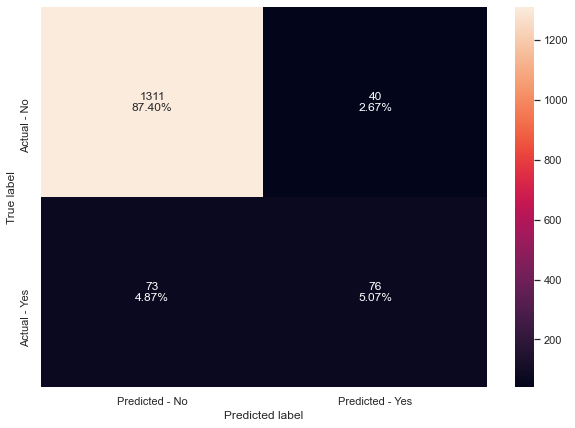

In [48]:
make_confusion_matrix(model,y_test)

In [49]:
X_train.head()

Experience  ZIPCode  CCAvg  Mortgage  Family_2  Family_3  Family_4  \
1334          22    94304    1.3         0         1         0         0   
4768          14    93118    2.0         0         0         0         0   
65            35    91360    3.8         0         0         0         0   
177            3    94132    1.8       244         0         0         1   
4489          13    95518    0.2         0         0         1         0   

      Age_24  Age_25  Age_26  Age_27  Age_28  Age_29  Age_30  Age_31  Age_32  \
1334       0       0       0       0       0       0       0       0       0   
4768       0       0       0       0       0       0       0       0       0   
65         0       0       0       0       0       0       0       0       0   
177        0       0       0       0       0       1       0       0       0   
4489       0       0       0       0       0       0       0       0       0   

      Age_33  Age_34  Age_35  Age_36  Age_37  Age_38  Age_39  Age_40  Age_41  \
1334       0       0       0       0       0       0       0       0       0   
4768       0       0       0       0       0       1       0       0       0   
65         0       0       0       0       0       0       0       0       0   
177        0       0       0       0       0       0       0       0       0   
4489       0       0       0       0       0       0       1       0       0   

      Age_42  Age_43  Age_44  Age_45  Age_46  Age_47  Age_48  Age_49  Age_50  \
1334       0       0       0       0       0       1       0       0       0   
4768       0       0       0       0       0       0       0       0       0   
65         0       0       0       0       0       0       0       0       0   
177        0       0       0       0       0       0       0       0       0   
4489       0       0       0       0       0       0       0       0       0   

      Age_51  Age_52  Age_53  Age_54  Age_55  Age_56  Age_57  Age_58  Age_59  \
1334       0       0       0       0       0       0       0       0       0   
4768       0       0       0       0       0       0       0       0       0   
65         0       0       0       0       0       0       0       0       1   
177        0       0       0       0       0       0       0       0       0   
4489       0       0       0       0       0       0       0       0       0   

      Age_60  Age_61  Age_62  Age_63  Age_64  Age_65  Age_66  Age_67  \
1334       0       0       0       0       0       0       0       0   
4768       0       0       0       0       0       0       0       0   
65         0       0       0       0       0       0       0       0   
177        0       0       0       0       0       0       0       0   
4489       0       0       0       0       0       0       0       0   

      Education_2  Education_3  Securities_Account_1  CD_Account_1  Online_1  \
1334            0            0                     0             0         1   
4768            1            0                     0             0         1   
65              0            0                     0             0         1   
177             1            0                     0             0         0   
4489            1            0                     0             0         1   

      CreditCard_1  
1334             0  
4768             0  
65               1  
177              0  
4489             0

In [50]:
y_train.value_counts(1)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

In [51]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [52]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.5100671140939598


## Comments

* For my recall sroce I got a training sroce of 1 and and test sroce of .51 which is bad and can be improved by Reducing over fitting using grid search
* CCAvg has a a strong relationship with the dependent variable

## Visualizing the Decision Tree

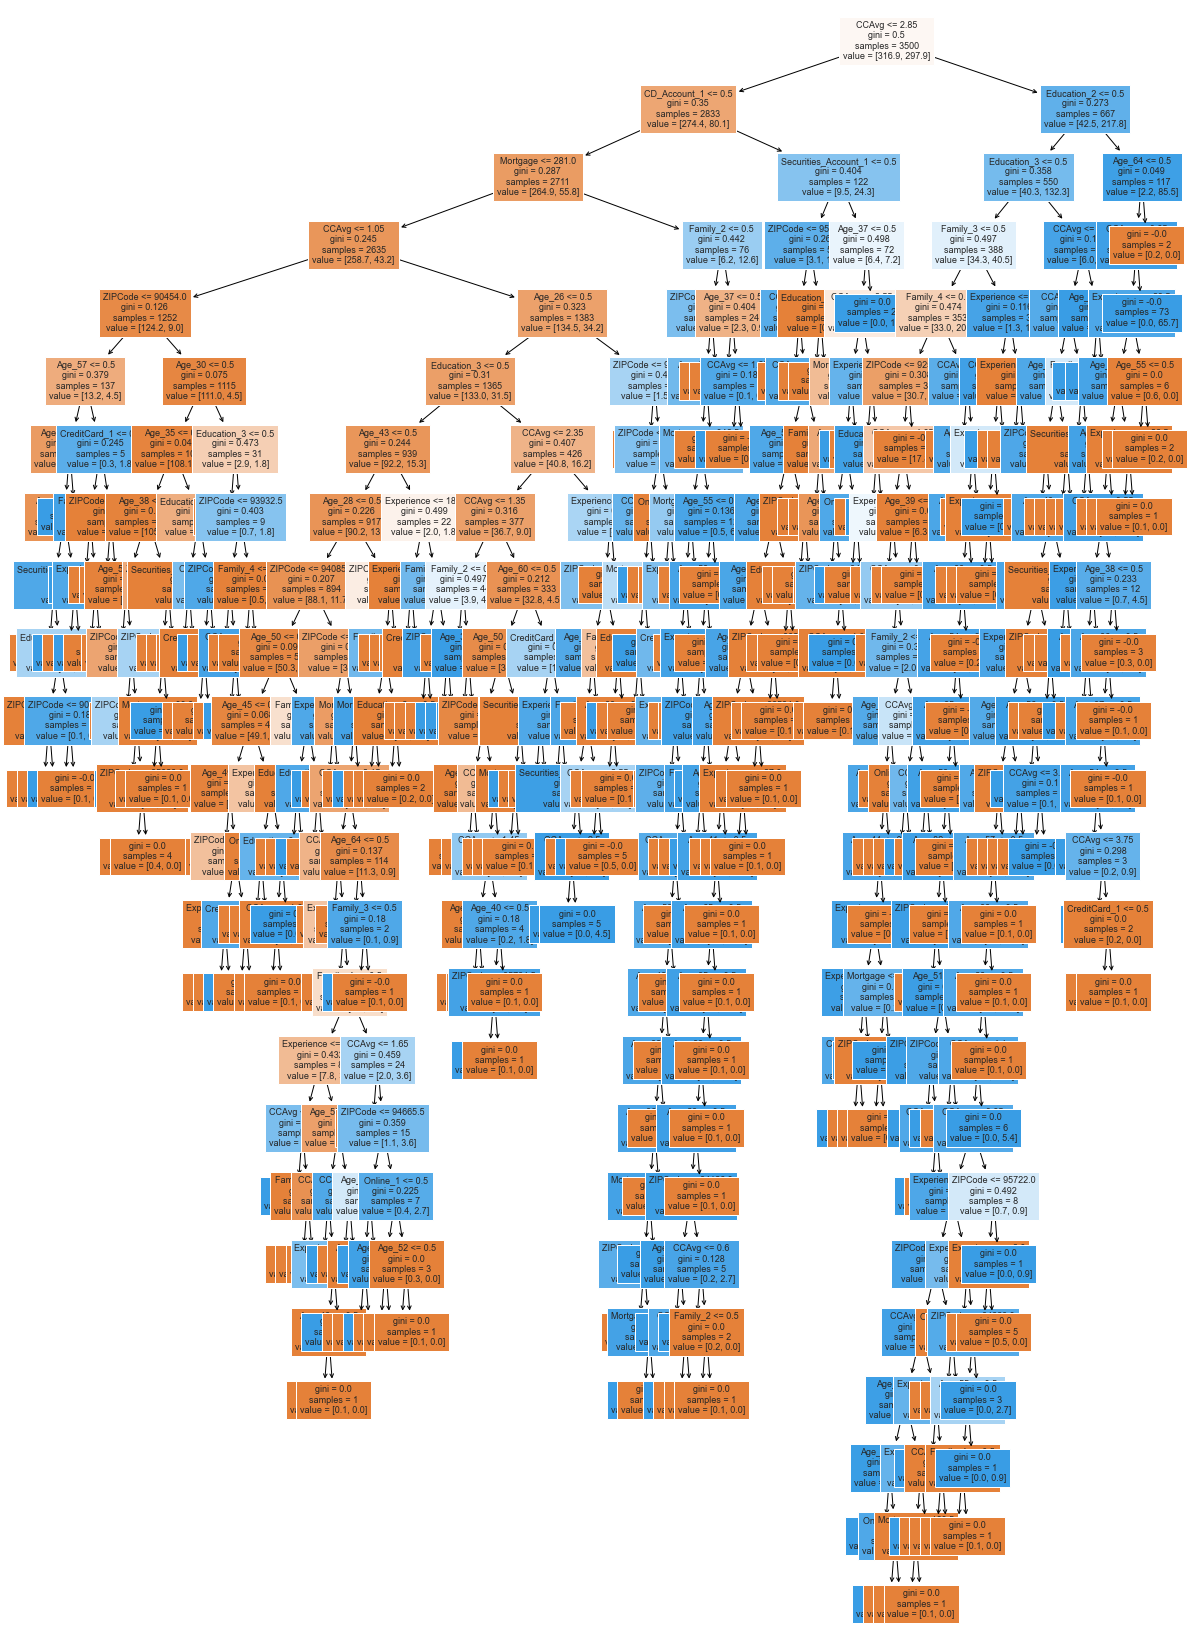

In [53]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

#### Text report showing the rules of a decision tree -

In [54]:
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- CCAvg <= 2.85
|   |--- CD_Account_1 <= 0.50
|   |   |--- Mortgage <= 281.00
|   |   |   |--- CCAvg <= 1.05
|   |   |   |   |--- ZIPCode <= 90454.00
|   |   |   |   |   |--- Age_57 <= 0.50
|   |   |   |   |   |   |--- Age_26 <= 0.50
|   |   |   |   |   |   |   |--- Age_31 <= 0.50
|   |   |   |   |   |   |   |   |--- Age_53 <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [12.30, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Age_53 >  0.50
|   |   |   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode <= 90047.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.10, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode >  90047.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode <= 90154.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.

In [55]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                               Imp
CCAvg                 4.638885e-01
ZIPCode               6.618807e-02
CD_Account_1          5.913420e-02
Education_3           5.673423e-02
Experience            5.289057e-02
Mortgage              4.683768e-02
Family_4              3.865759e-02
Family_3              3.547004e-02
Family_2              2.768380e-02
Education_2           1.872774e-02
Age_26                9.687036e-03
Age_50                7.963646e-03
Age_53                7.494160e-03
Age_57                7.251624e-03
Age_37                7.203089e-03
Age_64                7.138749e-03
Age_52                6.972160e-03
Securities_Account_1  6.548680e-03
CreditCard_1          5.909079e-03
Age_30                5.592634e-03
Age_60                5.376324e-03
Age_31                5.361996e-03
Age_43                5.000970e-03
Age_34                3.996246e-03
Age_38                3.952983e-03
Age_54                3.922938e-03
Age_65                3.902376e-03
Age_28              

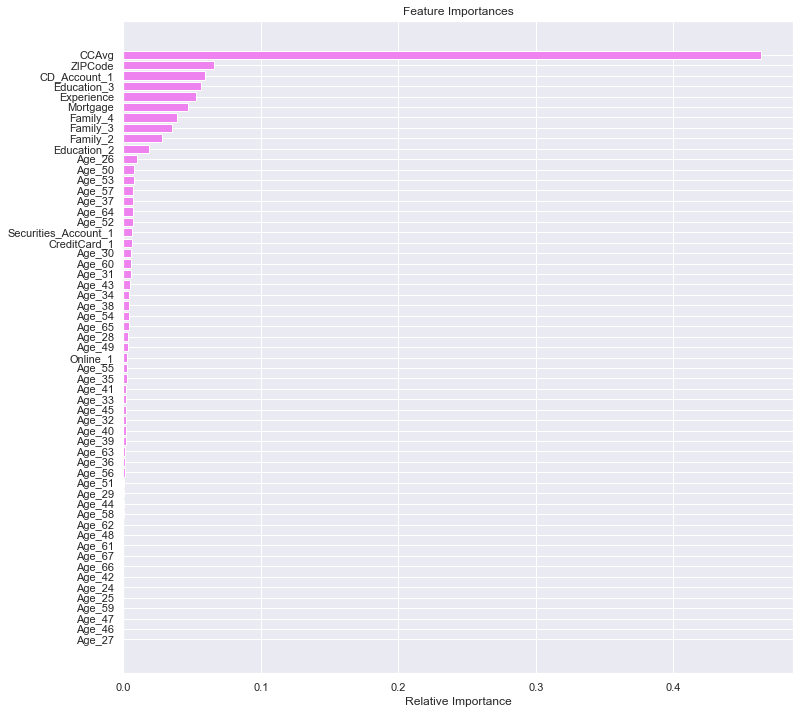

In [56]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Reducing over fitting

### Using GridSearch for Hyperparameter tuning of our tree model

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.10,1:.90}
)
# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=3, max_features='sqrt',
                       min_impurity_decrease=1e-06, random_state=1,
                       splitter='random')

In [59]:

make_confusion_matrix(estimator,y_test)

In [60]:
get_recall_score(estimator)

Recall on training set :  0.9516616314199395
Recall on test set :  0.8859060402684564


## Comments

* For my recall sroce I got a training sroce of .95 and and test sroce of .89 which is good and a whole lot better then my first model. I think this model can still be improved on by Cost Complexity Pruning

* CCAvg has a a strong relationship with the dependent variable 

## Visualizing the Decision New Tree

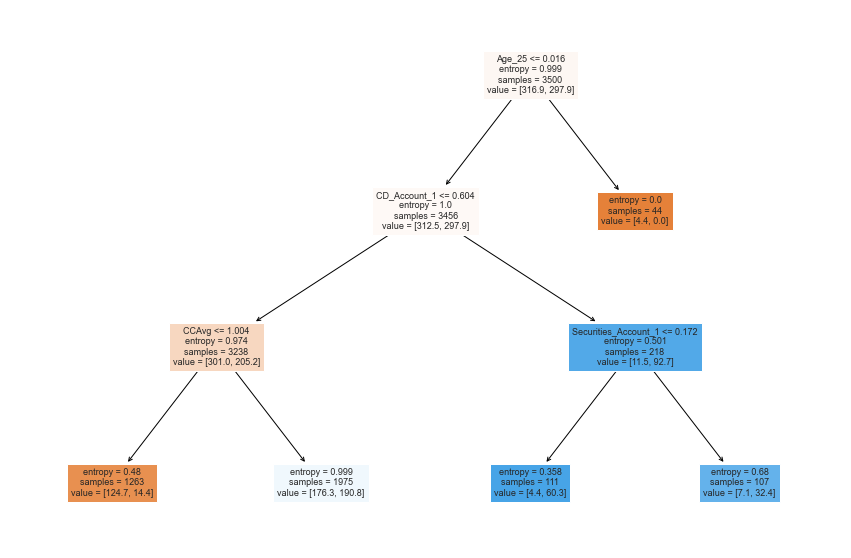

In [61]:

plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [62]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Age_25 <= 0.02
|   |--- CD_Account_1 <= 0.60
|   |   |--- CCAvg <= 1.00
|   |   |   |--- weights: [124.70, 14.40] class: 0
|   |   |--- CCAvg >  1.00
|   |   |   |--- weights: [176.30, 190.80] class: 1
|   |--- CD_Account_1 >  0.60
|   |   |--- Securities_Account_1 <= 0.17
|   |   |   |--- weights: [4.40, 60.30] class: 1
|   |   |--- Securities_Account_1 >  0.17
|   |   |   |--- weights: [7.10, 32.40] class: 1
|--- Age_25 >  0.02
|   |--- weights: [4.40, 0.00] class: 0



In [63]:
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
CD_Account_1          0.495871
CCAvg                 0.455215
Age_25                0.032307
Securities_Account_1  0.016608
Experience            0.000000
Age_59                0.000000
Age_49                0.000000
Age_50                0.000000
Age_51                0.000000
Age_52                0.000000
Age_53                0.000000
Age_54                0.000000
Age_55                0.000000
Age_56                0.000000
Age_57                0.000000
Age_58                0.000000
Age_62                0.000000
Age_60                0.000000
Age_61                0.000000
Age_47                0.000000
Age_63                0.000000
Age_64                0.000000
Age_65                0.000000
Age_66                0.000000
Age_67                0.000000
Education_2           0.000000
Education_3           0.000000
Online_1              0.000000
Age_48                0.000000
Age_45                0.000000
Age_46                0.000000
Age_32  

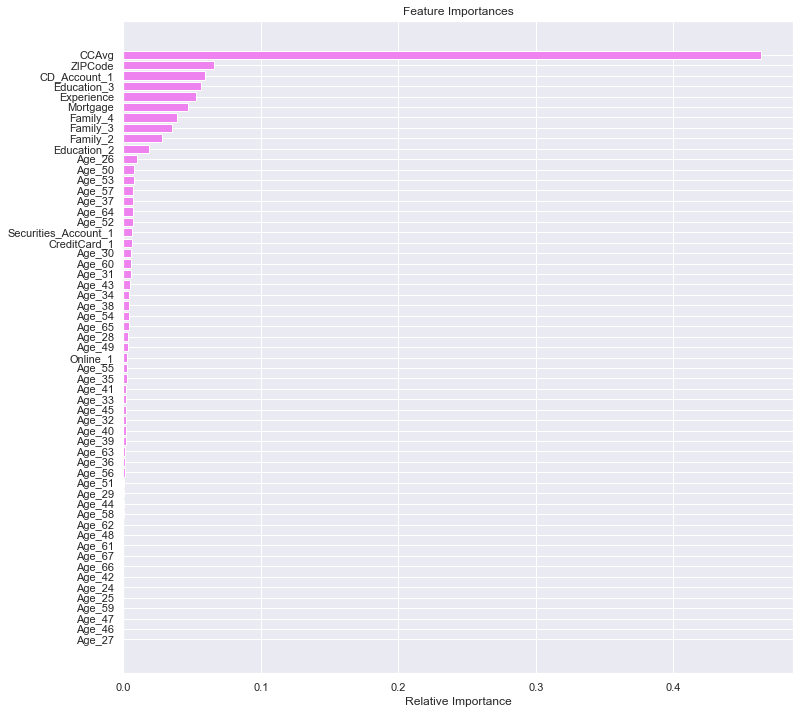

In [64]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Cost Complexity Pruning

In [65]:

clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.10,1:0.90})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [66]:
pd.DataFrame(path)

ccp_alphas    impurities
0    0.000000e+00 -7.164622e-16
1    1.805828e-19 -7.162817e-16
2    1.805828e-19 -7.161011e-16
3    1.805828e-19 -7.159205e-16
4    1.805828e-19 -7.157399e-16
5    1.805828e-19 -7.155593e-16
6    1.805828e-19 -7.153787e-16
7    3.611656e-19 -7.150176e-16
8    3.611656e-19 -7.146564e-16
9    3.792239e-19 -7.142772e-16
10   3.792239e-19 -7.138980e-16
11   3.792239e-19 -7.135187e-16
12   3.792239e-19 -7.131395e-16
13   5.056318e-19 -7.126339e-16
14   5.056318e-19 -7.121283e-16
15   5.959232e-19 -7.115323e-16
16   6.500981e-19 -7.108822e-16
17   9.209723e-19 -7.099613e-16
18   1.011264e-18 -7.089500e-16
19   1.011264e-18 -7.079387e-16
20   1.083497e-18 -7.068552e-16
21   1.083497e-18 -7.057717e-16
22   1.083497e-18 -7.046882e-16
23   1.083497e-18 -7.036047e-16
24   1.191846e-18 -7.024129e-16
25   1.300196e-18 -7.011127e-16
26   1.300196e-18 -6.998125e-16
27   1.354371e-18 -6.984581e-16
28   1.444662e-18 -6.970135e-16
29   1.769711e-18 -6.952438e-16
30   2.148935e-18 -6.930948e-16
31   2.455926e-18 -6.906389e-16
32   2.780975e-18 -6.878579e-16
33   2.925441e-18 -6.849325e-16
34   3.178257e-18 -6.817542e-16
35   3.250490e-18 -6.785037e-16
36   3.575539e-18 -6.749282e-16
37   6.500981e-18 -6.684272e-16
38   8.704091e-18 -6.597231e-16
39   8.704091e-18 -6.510190e-16
40   8.704091e-18 -6.423149e-16
41   8.704091e-18 -6.336109e-16
42   8.704091e-18 -6.249068e-16
43   8.704091e-18 -6.162027e-16
44   9.426422e-18 -6.067763e-16
45   1.300196e-17 -5.937743e-16
46   1.300196e-17 -5.807723e-16
47   1.413963e-17 -5.666327e-16
48   1.739012e-17 -5.492426e-16
49   1.769711e-17 -5.315455e-16
50   2.166994e-17 -5.098755e-16
51   2.600392e-17 -4.838716e-16
52   2.752082e-17 -4.563508e-16
53   1.196180e-16 -3.367327e-16
54   1.608993e-16 -1.758335e-16
55   2.309473e-16  5.511387e-17
56   1.540938e-04  3.081875e-04
57   1.591186e-04  6.264246e-04
58   1.602800e-04  1.267545e-03
59   1.614585e-04  1.590462e-03
60   1.615328e-04  1.913527e-03
61   1.615328e-04  2.236593e-03
62   2.833337e-04  4.503262e-03
63   2.926163e-04  5.673728e-03
64   2.927781e-04  6.259284e-03
65   2.927781e-04  6.844840e-03
66   2.927781e-04  7.137618e-03
67   2.927781e-04  7.430396e-03
68   2.927781e-04  7.723175e-03
69   2.927781e-04  8.015953e-03
70   2.927781e-04  8.308731e-03
71   2.927781e-04  8.601509e-03
72   2.927781e-04  8.894287e-03
73   2.927781e-04  9.187065e-03
74   2.927781e-04  9.479843e-03
75   2.987532e-04  1.067486e-02
76   3.013893e-04  1.218180e-02
77   3.069192e-04  1.340948e-02
78   3.072908e-04  1.586781e-02
79   3.081875e-04  1.617599e-02
80   3.081875e-04  1.648418e-02
81   3.136909e-04  1.679787e-02
82   3.136909e-04  1.711156e-02
83   3.165466e-04  1.774466e-02
84   3.193943e-04  1.806405e-02
85   3.211115e-04  1.870627e-02
86   4.198187e-04  1.996573e-02
87   4.636369e-04  2.089300e-02
88   5.271471e-04  2.142015e-02
89   5.283215e-04  2.194847e-02
90   5.323239e-04  2.248080e-02
91   5.323239e-04  2.301312e-02
92   5.562785e-04  2.579451e-02
93   5.720806e-04  2.751075e-02
94   5.735167e-04  3.726054e-02
95   5.855563e-04  3.784609e-02
96   6.249020e-04  3.847100e-02
97   6.632806e-04  4.046084e-02
98   7.319453e-04  4.119278e-02
99   7.319453e-04  4.192473e-02
100  7.319453e-04  4.265667e-02
101  7.528581e-04  4.340953e-02
102  7.533065e-04  4.416284e-02
103  7.647856e-04  4.645719e-02
104  7.782134e-04  4.723541e-02
105  7.842272e-04  5.037232e-02
106  8.030242e-04  5.278139e-02
107  8.066336e-04  5.358802e-02
108  8.090703e-04  5.601523e-02
109  9.595708e-04  6.177266e-02
110  9.647609e-04  6.273742e-02
111  9.647609e-04  6.370218e-02
112  9.701438e-04  6.758276e-02
113  1.000748e-03  6.858350e-02
114  1.025315e-03  7.165945e-02
115  1.039970e-03  7.373939e-02
116  1.054001e-03  7.479339e-02
117  1.099703e-03  7.699280e-02
118  1.141835e-03  7.813463e-02
119  1.195201e-03  7.932983e-02
120  1.203002e-03  8.654784e-02
121  1.216155e-03  8.776400e-02
122  1.283281e-03  8.904728e-02
123  1.441643e-03  9.048892e-02
124  1.

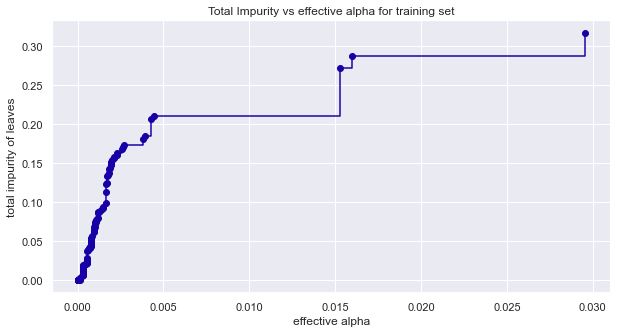

In [67]:

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [68]:

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.10,1:0.90})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.18214402026679288


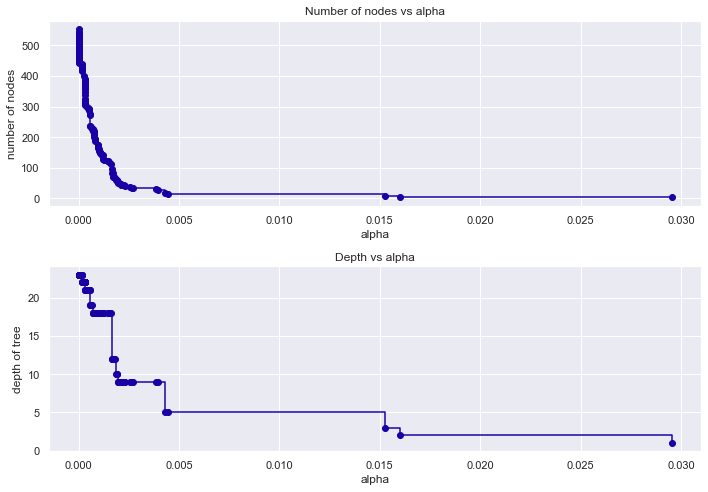

In [69]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [70]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [71]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [72]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

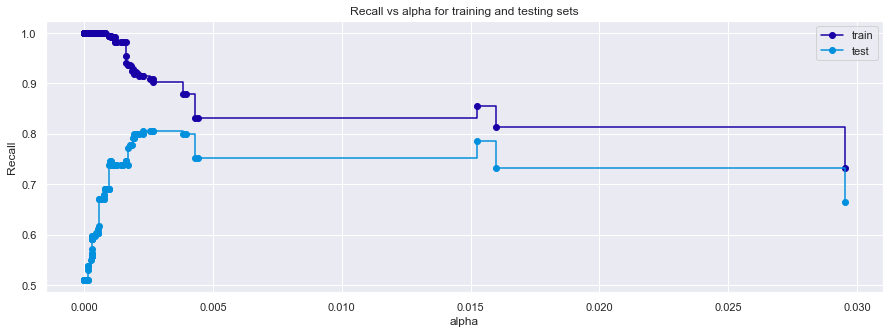

In [73]:

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [74]:

# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.002284272280085535,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


In [75]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002284272280085535,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

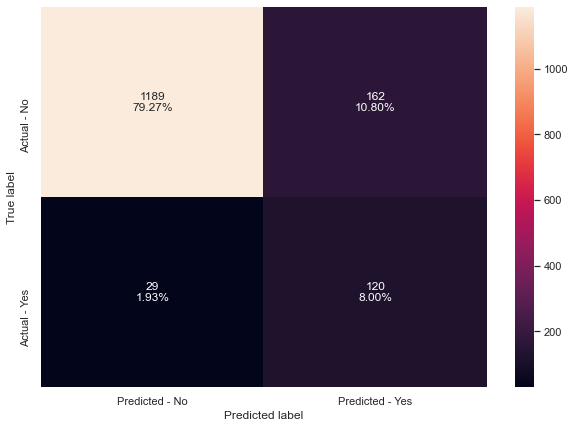

In [76]:
make_confusion_matrix(best_model,y_test)

In [77]:
get_recall_score(best_model)

Recall on training set :  0.9154078549848943
Recall on test set :  0.8053691275167785


### Comments

* For my recall sroce I got a training sroce of .91 and and test sroce of .80 which is bad because it is worse then the last model and i still think it can be improved by using the Ccp_Alpha
* CCAvg has a a strong relationship with the dependent variable

## Visualizing the Decision Tree

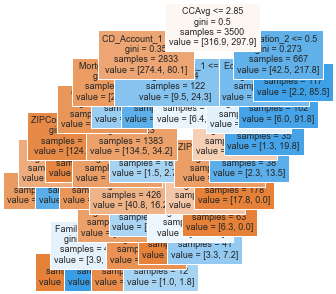

In [78]:
plt.figure(figsize=(5,5))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [93]:
best_model = DecisionTreeClassifier(ccp_alpha=0.0022,class_weight={0: 0.10, 1: 0.90},random_state=1)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0022, class_weight={0: 0.1, 1: 0.9},
                       random_state=1)

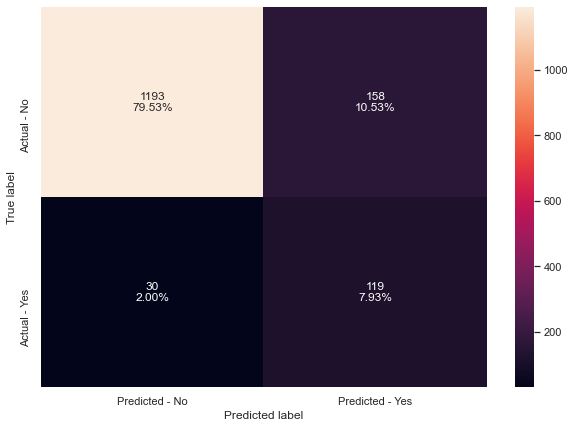

In [94]:
make_confusion_matrix(best_model,y_test)

In [95]:
get_recall_score(best_model)

Recall on training set :  0.9154078549848943
Recall on test set :  0.7986577181208053


### Comments

* For my recall sroce I got a training sroce of .91 which is the same and test sroce of .80 which is lower then the last model. I dont think this model can be impoved anymore.
* CCAvg has a a strong relationship with the dependent variable

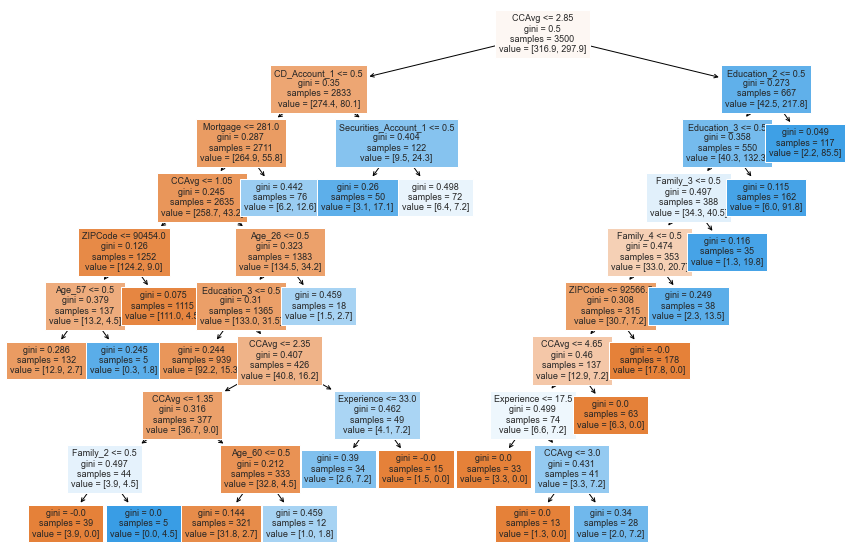

In [96]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [97]:

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
CCAvg                 0.592505
CD_Account_1          0.086548
Education_3           0.070885
Family_4              0.046926
Mortgage              0.046871
Family_3              0.044140
Education_2           0.024073
Family_2              0.019914
ZIPCode               0.018325
Experience            0.017946
Age_57                0.008255
Age_26                0.007953
Age_60                0.007869
Securities_Account_1  0.007791
Age_52                0.000000
Age_58                0.000000
Age_53                0.000000
Age_54                0.000000
Age_55                0.000000
Age_56                0.000000
Age_51                0.000000
Age_64                0.000000
Age_59                0.000000
Age_61                0.000000
Age_62                0.000000
Age_63                0.000000
Age_49                0.000000
Age_65                0.000000
Age_66                0.000000
Age_67                0.000000
Online_1              0.000000
Age_50  

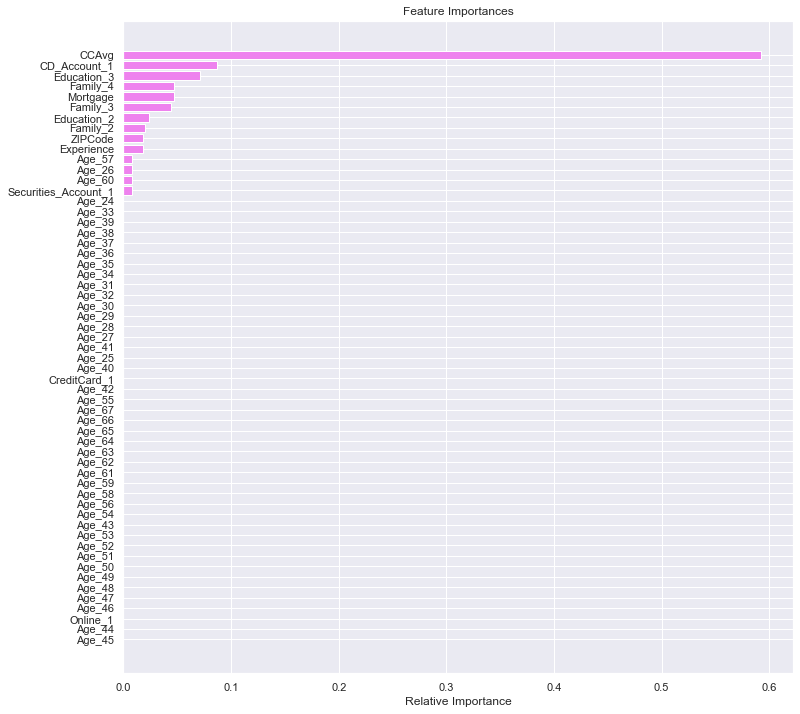

In [98]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Creating model with 0.0032 ccp_alpha**

In [99]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.0032,
                       class_weight={0: 0.10, 1: 0.90},random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0032, class_weight={0: 0.1, 1: 0.9},
                       random_state=1)

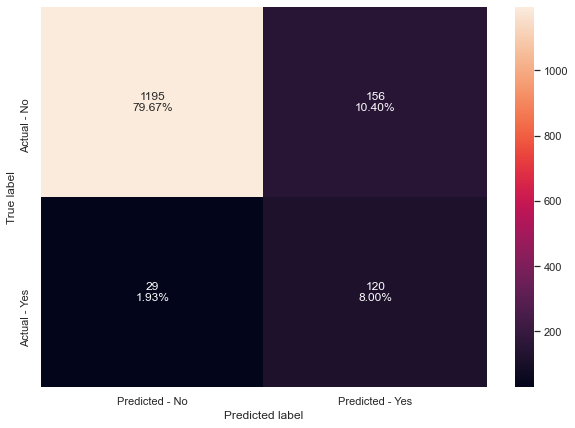

In [100]:
make_confusion_matrix(best_model2,y_test)

In [101]:
get_recall_score(best_model2)

Recall on training set :  0.9033232628398792
Recall on test set :  0.8053691275167785


## Visualizing the Decision Tree

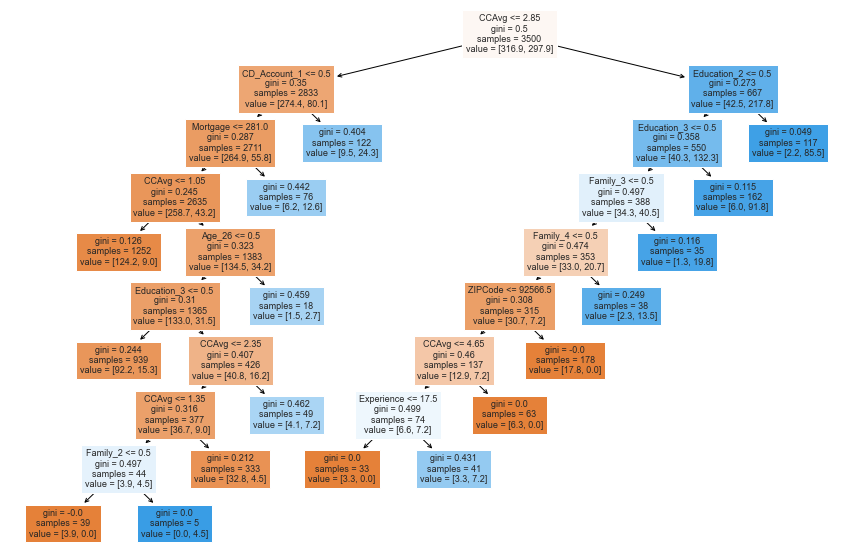

In [102]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [103]:
print(tree.export_text(best_model2,feature_names=feature_names,show_weights=True))

|--- CCAvg <= 2.85
|   |--- CD_Account_1 <= 0.50
|   |   |--- Mortgage <= 281.00
|   |   |   |--- CCAvg <= 1.05
|   |   |   |   |--- weights: [124.20, 9.00] class: 0
|   |   |   |--- CCAvg >  1.05
|   |   |   |   |--- Age_26 <= 0.50
|   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |--- weights: [92.20, 15.30] class: 0
|   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |--- CCAvg <= 2.35
|   |   |   |   |   |   |   |--- CCAvg <= 1.35
|   |   |   |   |   |   |   |   |--- Family_2 <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [3.90, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Family_2 >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 4.50] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  1.35
|   |   |   |   |   |   |   |   |--- weights: [32.80, 4.50] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.35
|   |   |   |   |   |   |   |--- weights: [4.10, 7.20] class: 1
|   |   |   |   |--- Age_26 >  0.50
|   |   |   | 

In [104]:
print (pd.DataFrame(best_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
CCAvg                 0.612843
CD_Account_1          0.090535
Education_3           0.074150
Family_4              0.049088
Mortgage              0.049030
Family_3              0.046173
Education_2           0.025182
Family_2              0.020831
ZIPCode               0.012077
Experience            0.011771
Age_26                0.008319
Age_54                0.000000
Age_57                0.000000
Age_56                0.000000
Age_55                0.000000
Age_52                0.000000
Age_53                0.000000
Age_59                0.000000
Age_51                0.000000
Age_58                0.000000
Age_64                0.000000
Age_60                0.000000
Age_61                0.000000
Age_62                0.000000
Age_63                0.000000
Age_49                0.000000
Age_65                0.000000
Age_66                0.000000
Age_67                0.000000
Securities_Account_1  0.000000
Online_1              0.000000
Age_50  

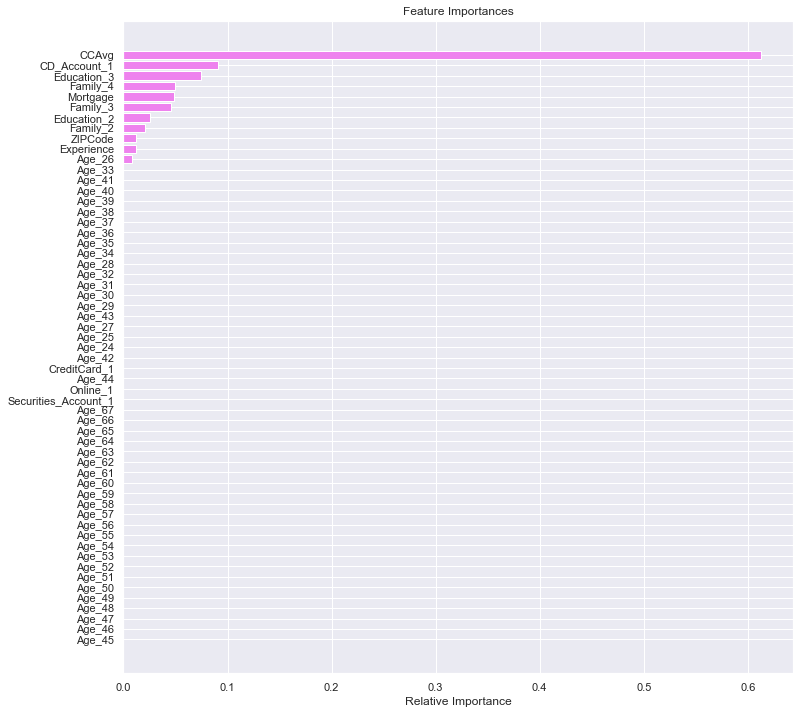

In [105]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Comparing all the decision tree models

In [108]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning','Best Model using ccp_alpha'], 'Train_Recall':[1,0.95,0.91,0.90], 'Test_Recall':[0.51,0.88,0.79,0.80]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                Initial decision tree model          1.00         0.51
1  Decision treee with hyperparameter tuning          0.95         0.88
2            Decision tree with post-pruning          0.91         0.79
3                 Best Model using ccp_alpha          0.90         0.80

### Comments

I think my recall sroce was the best at Decision treee with hyperparameter tuning and i shouldnt have done  post-pruning or Best Model using ccp_alpha.

# Conclusions/Recommendations

###### The model indicates that the most significant predictors for a customer are 

* CCAvg                 4.638885e-01
* ZIPCode               6.618807e-02
* CD_Account_1          5.913420e-02
* Education_3           5.673423e-02
* Experience            5.289057e-02
* Mortgage              4.683768e-02
* Family_4              3.865759e-02

##### * Which means that they should be targeting those customers with mid range CCAvg, live in a desent area, have a cd Account, Advanced/Professional education, work experience, mortgage and a family size of 4. 


